Accuracy: 0.9186

Best Parameters: {'C': 10, 'class_weight': None, 'solver': 'liblinear'}

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      4068
         1.0       0.99      0.84      0.91      4067

    accuracy                           0.92      8135
   macro avg       0.93      0.92      0.92      8135
weighted avg       0.93      0.92      0.92      8135



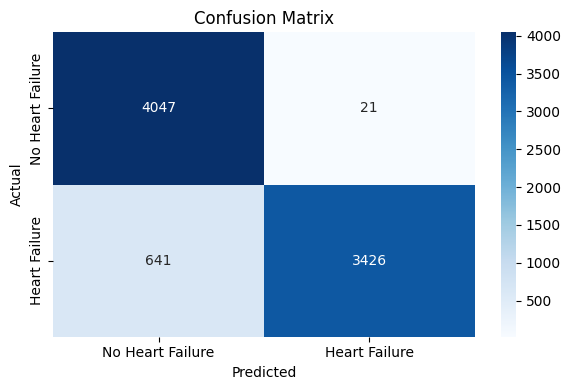

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # To balance the dataset

# Load the dataset
df = pd.read_csv("heart_failure_prediction.csv.csv") 
df.head()

# Drop unnecessary columns
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

# Handle missing values
df = df.dropna()

# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Define features and target
X = df.drop("Heart_Failure", axis=1)
y = df["Heart_Failure"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balance the dataset (if imbalanced) using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Define the Logistic Regression model with hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers for logistic regression
    'class_weight': [None, 'balanced'],  # Handle imbalanced classes
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nBest Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", report)

# Confusion matrix plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Heart Failure", "Heart Failure"],
            yticklabels=["No Heart Failure", "Heart Failure"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [3]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

# Load dataset for column structure (to get encodings and scaling right)
df = pd.read_csv("heart_failure_prediction.csv.csv") 

# Drop unnecessary columns
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

# Drop missing values
df = df.dropna()

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Prepare features and target
X = df.drop("Heart_Failure", axis=1)
y = df["Heart_Failure"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Retrain best model (can be saved and loaded using joblib)
model = LogisticRegression(C=1, solver='liblinear', class_weight='balanced', random_state=42)
model.fit(X_scaled, y)

# Streamlit UI
st.title("💓 Heart Failure Prediction App")
st.write("Enter patient data to predict the likelihood of heart failure.")

# Input fields
input_data = {}
for col in X.columns:
    if col in categorical_cols:
        options = label_encoders[col].classes_
        user_input = st.selectbox(f"{col}", options)
        encoded_input = label_encoders[col].transform([user_input])[0]
        input_data[col] = encoded_input
    else:
        user_input = st.number_input(f"{col}", value=float(df[col].mean()))
        input_data[col] = user_input

# Prediction
if st.button("Predict"):
    input_df = pd.DataFrame([input_data])
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][prediction]

    if prediction == 1:
        st.error(f"⚠️ High Risk of Heart Failure (Confidence: {probability:.2%})")
    else:
        st.success(f"✅ Low Risk of Heart Failure (Confidence: {probability:.2%})")


2025-05-01 05:20:56.152 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-01 05:20:56.617 
  command:

    streamlit run C:\Users\ADIT PC\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-01 05:20:56.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-01 05:20:56.619 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-01 05:20:56.619 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-01 05:20:56.620 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-01 05:20:56.620 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-01 05:20:56.630 Th